# ** Laboratorio 7: Implementación algoritmo de Newton**
**Facultad de ingeniería, departamento de Ingeniería Biomédica, Universidad de los Andes**\
**IBIO-2440 Programación científica**

**Nombres de los integrantes**


1.   David Tobón Molina
2.   David Santiago Rodríguez Quiroga

**Número del grupo**

Grupo 2

# **Método de Newton**
El método de Newton es una alternativa al algoritmo de descenso de gradiente al tener en cuenta la segunda derivada de la función que se desea optimizar. Considere la función $f: \mathbb{R}^n → \mathbb{R}$. Sea $x[k]\in\mathbb{R}^n$ el valor del candidato a solución en la iteración $k$. La regla de actualización en el método de Newton es:
\begin{align*}
  x[k+1] = x[k] - F^{-1}(x[k])∇f( x[k]),
\end{align*}
donde $F^{-1}(x[k])$ es la inversa de la Hessiana evaluada en x[k]. 

\\

El algoritmo completo se podría plantear de la siguiente manera:
0. Definir k=0, un parámetro de convergengia $ϵ$ y un número máximo de iteraciones $N_{max}$
1. Seleccionar un punto inicial $x[0]$
2. Calcular $∇f( x[k])$ y $F^{-1}(x[k])$
3. Calcular $x[k+1] = x[k] - F^{-1}(x[k])∇f( x[k])$
4. Si $||x[k+1]-x[k]||_2<ϵ$, parar. Si no, $k=k+1$ y volver al paso 2.


El objetivo de esta práctica es comparar el método de Newton con el algortimo de descenso de gradiente para minimizar una función de prueba dada con una condición de parada previamente definida. Para esto, considere la siguiente función:

\begin{align*}
 f(x) = (1-x_1)^2 + 5(x_2-x_1^2)^2,
\end{align*}

donde $x=[x_1,x_2]^T$. Con base en lo anterior, siga los siguientes pasos:





1. Encuentre el vector gradiente y la matriz Hessiana manualmente y escribalos a continuación.

**Responder aquí**

2. Implemente el método de Newton teniendo en cuenta las condición de parada mencionada anteriormente con los siguientes parámetros:

 - $ϵ=0.1$
 - $x[0]=[0,0]^T$


In [32]:
import numpy as np
import matplotlib.pyplot as plt

def graph_curvas_nivel(sol_matrix):
    
    if len(sol_matrix) > 1:

        lvls =[]
    
        x_1, x_2 = np.linspace(-8, 8, 200), np.linspace(-8, 8, 200)
        X1, X2 = np.meshgrid(x_1, x_2)
        
        function_graph = (1 - X1)**2 + 5*(X2 - X1**2)**2
        
        for i in sol_matrix:
            lvls.append(i[2])
            
        if sol_matrix[0][2] > sol_matrix[1][2]:
            
            lvls = lvls[::-1]
        
        lvls.sort() 
        print(lvls)  
        plt.figure()
        ax = plt.subplot()
        ax.margins(x=-0.3, y=-0.3)
        plt.contour(X1, X2, function_graph, levels=lvls, colors='red')
        plt.grid()
        
        for i in range(len(sol_matrix)-1):
            
            x = float(sol_matrix[i][0])
            y = float(sol_matrix[i][1])
            dx = float(sol_matrix[i+1][0]) - x
            dy = float(sol_matrix[i+1][1]) - y
            ax.arrow(x, y, dx, dy, head_width=0.15, head_length=0.2, length_includes_head=True)

        plt.show()
    

def func(x):
    
    return ((1 - x[0])**2) + (5 * ((x[1] - (x[0]**2))**2))


def numeric_gradient(xi, f, h=0.000001):

    gradient_result = np.zeros(len(xi))

    for i in range(len(xi)):
        xi_k = np.copy(xi)
        xi_k[i] = xi[i]+h
        gradient_result[i] = (f(xi_k)-f(xi))/h

    return gradient_result


def numeric_gradient2(xi):
    
    df_dx1 = (20*(xi[0]**3)) + (2*xi[0]) + (-20*xi[1]*xi[0]) - 2
    df_dx2 = (10*xi[1]) + (-10*(xi[0]**2))
    
    return np.array([df_dx1, df_dx2])


def hess(xi):
    
    df2_x1 = (60*(xi[0]**2)) + (-20*xi[1]) + 2
    df2_x2 = 10
    df2_x1_x2 = -20*xi[0]
    
    return np.array([[df2_x1, df2_x1_x2], [df2_x1_x2, df2_x2]])


def Newton_method(x0, e, f=func, gradient_f=numeric_gradient2, hess_f=hess, n_max=500):
    
    sol_matrix = []
    xk = np.copy(x0)
    stop = False
    n = 0
    
    while not stop:
        
        num_grad = gradient_f(xk)
        #print(num_grad)
        hessian = hess_f(xk)
        #print(hessian)
        inverse_hessian = np.linalg.inv(hessian)
        #print(inverse_hessian)
        
        xk_1 = xk - np.dot(inverse_hessian, num_grad)
        
        norm = np.linalg.norm(xk_1 - xk)
        
        sol_matrix.append([])
        sol_matrix[n].append(xk[0])
        sol_matrix[n].append(xk[1])
        sol_matrix[n].append(f(xk))
        sol_matrix[n].append(norm)
        sol_matrix[n].append(n+1)
        
        if norm < e:
            stop = True
        elif n+1 >= n_max:
            stop = True
        else:
            xk = np.copy(xk_1)
            n += 1
    
    return sol_matrix, [n+1, x0, xk, f(xk), e]
    

[0, 0, 1, 1.0, 1]


[1.0, 0.0, 5.0, 1.0, 2]


[1.0, 1.0, 0.0, 0.0, 3]


[3, array([0, 0]), array([1., 1.]), 0.0, 0.1]
[0.0, 1, 5.0]


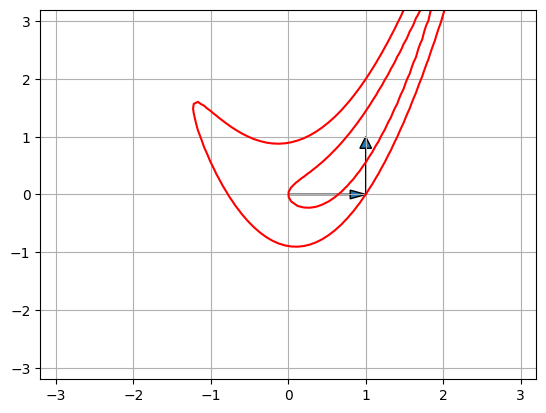

In [33]:
x0 = np.array([0, 0]).T
e = 0.1
resp1 = Newton_method(x0, e)

for i in resp1[0]:
    print(i)
    print('\n')
    
print(resp1[1])

graph_curvas_nivel(resp1[0])

3. Realice tres gráficas:

*   La trayectoria de $x[k]$ para los diferentes $k$ en un espacio de dos dimensiones. Es decir, los saltos que dió el algoritmo.
*   El valor la función objetivo vs número de iteraciones $k$.
*   El valor de $||x[k+1]-x[k]||_2$ vs número de iteraciones 



In [34]:
# Formato de sol matrix: [x1, x2, f(x), norma, n_it]
 

4. Ahora, use el algortimo de descenso de gradiente hecho en prácticas anteriores para encontrar el mínimo de la función. Use $α=0.01$.

In [35]:
def gradient_descent(x0, e, a, f=func, gradient_f=numeric_gradient2, n_max=500):
    
    sol_matrix = []
    xk = np.copy(x0)
    n = 0
    stop = False

    while not stop:

        num_grad = gradient_f(xk)
        xk_1 = xk - (a*num_grad)

        norm = np.linalg.norm(xk_1 - xk)
        
        sol_matrix.append([])
        sol_matrix[n].append(xk[0])
        sol_matrix[n].append(xk[1])
        sol_matrix[n].append(f(xk))
        sol_matrix[n].append(norm)
        sol_matrix[n].append(n+1)
        
        if norm < e:
            stop = True
        elif n+1 >= n_max:
            stop = True
        else:
            xk = np.copy(xk_1)
            n += 1
    
    return sol_matrix, [n+1, x0, xk, f(xk), e, a]

In [36]:
a = 0.01
resp2 = gradient_descent(x0, e, a)

for i in resp2[0]:
    print(i)
    print('\n')
    
print(resp2[1])

[0, 0, 1, 0.02, 1]


[1, array([0, 0]), array([0, 0]), 1, 0.1, 0.01]


5. Para el algoritmo de descenso de gradiente implementado en el punto 4., realice tres gráficas:

*   La trayectoria de $x[k]$ para los diferentes $k$ en un espacio de dos dimensiones. Es decir, los saltos que dió el algoritmo.
*   El valor la función objetivo vs número de iteraciones $k$.
*   El valor de $||x[k+1]-x[k]||_2$ vs número de iteraciones 

6. Responda las siguientes preguntas:

- ¿Por qué cree que al algoritmo de descenso de gradiente le cuesta más converger que el método de Newton?

- Note el grado del polinómio de la función, ¿para qué grado polinómico el método de Newton converge en una sola iteración?

- ¿Cree que el punto inicial influye en la convergencia de ambos algortimos?

- ¿Cómo podría mejorar la eficiencia del descenso de gradiente?